In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Load House prices dataset


In [3]:
import pandas as pd

try:
  df = pd.read_csv('/content/drive/MyDrive/data.csv')
  print("Dataset loaded successfully!")
  display(df.head(5))
except FileNotFoundError:
  print("Error: The file was not found. Please double-check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

Dataset loaded successfully!


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Explore: print first 5 rows, identify data types

In [4]:
print("\nData types of each column:")
print(df.info())


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-

Clean: handle missing values,

In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


fix numeric conversions.


In [15]:
import pandas as pd

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

print("\nData types after converting 'date' column:")
print(df.info())


Data types after converting 'date' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null

Apply formulas from Task 4 (mean, median, mode, variance, std_dev) on related columns.

In [ ]:
def mean(numbers):
    return sum(numbers) / len(numbers)
numbers=[2,5,6,7,8,9]
mean(numbers)


6.166666666666667

In [6]:
mean_bathrooms = df['bathrooms'].mean()
print(f"The mean number of bathrooms is: {mean_bathrooms}")

The mean number of bathrooms is: 2.1608152173913044


In [7]:
median_sqft_living = df['sqft_living'].median()
print(f"The median square footage of living area is: {median_sqft_living}")

The median square footage of living area is: 1980.0


In [10]:
mode_sqft_lot = df['sqft_lot'].mode()
print(f"The mode square footage of lot is: {mode_sqft_lot}")

The mode square footage of lot is: 0    5000
Name: sqft_lot, dtype: int64


In [11]:
variance_sqft_above = df['sqft_above'].var()
print(f"The variance of square footage above ground is: {variance_sqft_above}")

The variance of square footage above ground is: 743335.3448367333


In [12]:
std_deviation_sqft_above = df['sqft_above'].std()
print(f"The standard deviation of square footage above ground is: {std_deviation_sqft_above}")

The standard deviation of square footage above ground is: 862.1689769625983


Visualize data with Matplotlib:

a) Histogram for numeric column

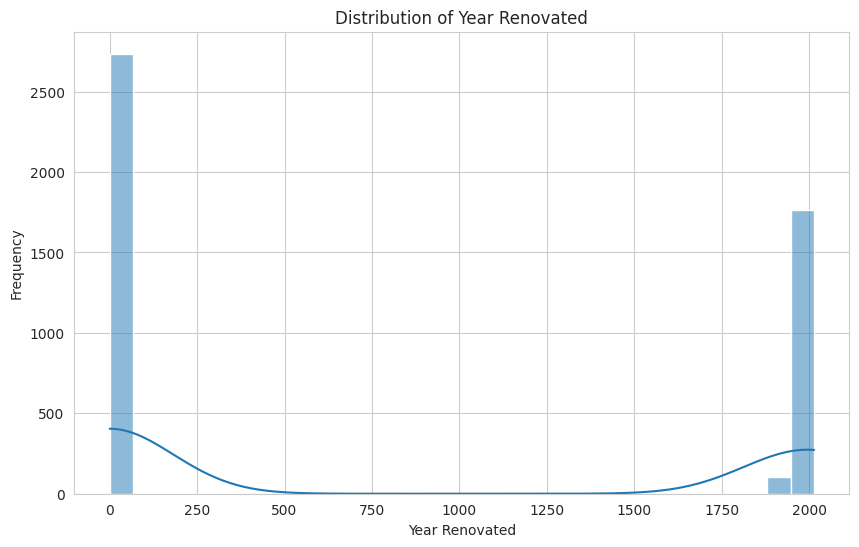

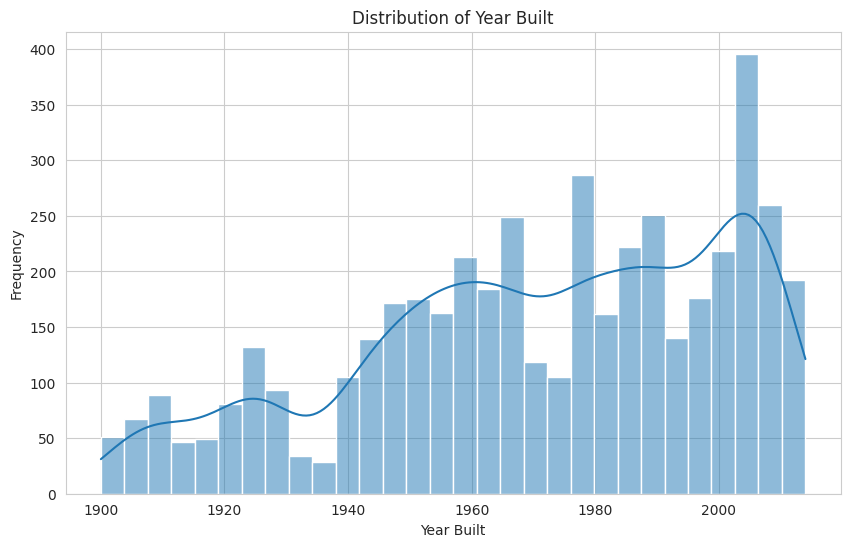

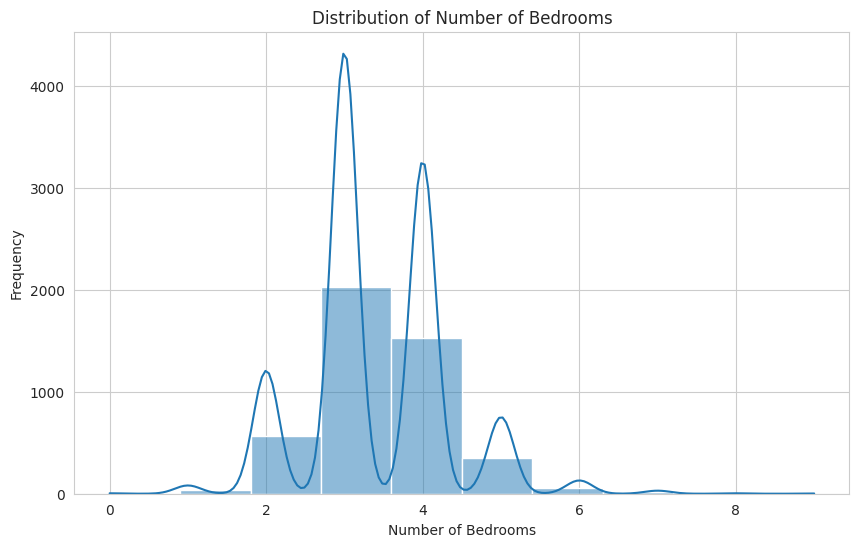

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create a histogram for 'yr_renovated'
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_renovated'], bins=30, kde=True)
plt.title('Distribution of Year Renovated')
plt.xlabel('Year Renovated')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for 'yr_built'
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'], bins=30, kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for 'bedrooms'
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'], bins=10, kde=True) # Fewer bins for discrete data like bedrooms
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

b) Bar chart for categorical column

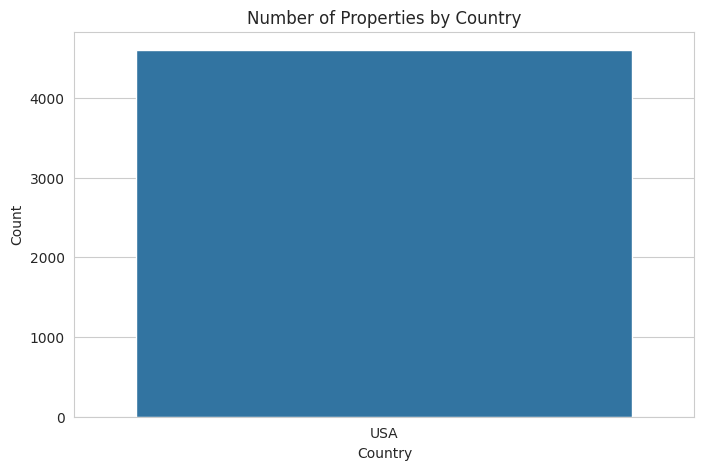

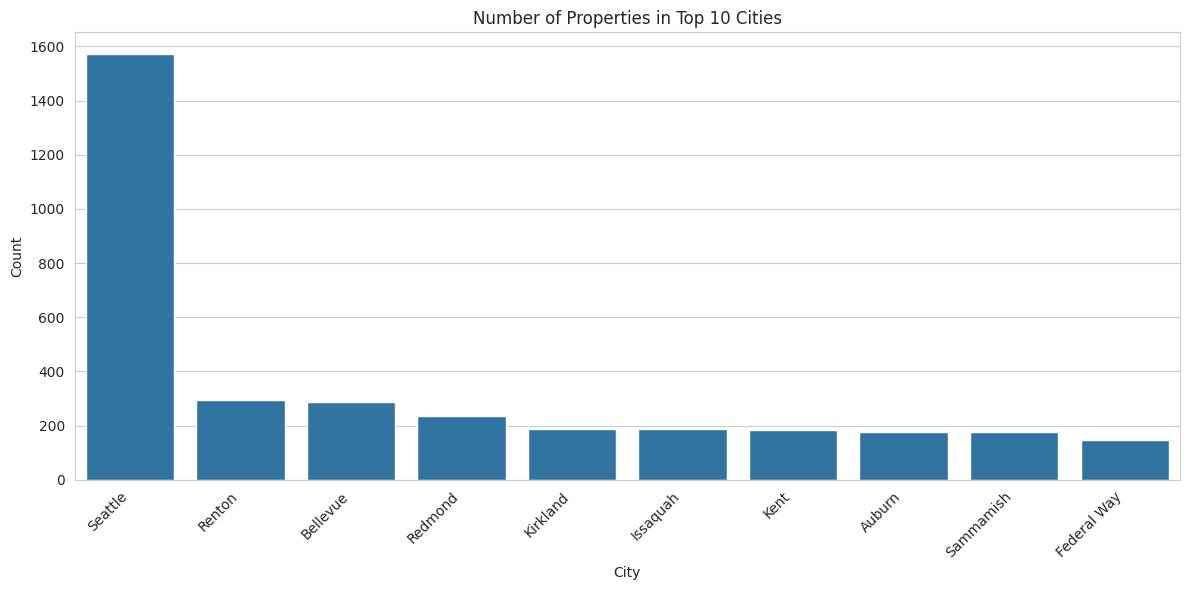

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create a bar chart for 'country'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Number of Properties by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Create a bar chart for the top 10 cities
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities)
plt.title('Number of Properties in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Add a Markdown cell at the end:
a) What did you learn from this dataset?
b) How did visualization help?
c) What cleaning issues did you face and how did you fix them?

a) I learned from this dataset is to first clean your dataset to get better and accurate results.In my case the dataset is clean if in case its not then we should clean it using techniques like droping null values using dropna or filling missing values using mean ,median ,mode.

b) Visualization helped me as there is no need to check excel file manually with limited insights using matplotlib or seaborn i can visulaize data for better understandings.

c) I didnt face any challenge while cleaning my dataset.
